In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv("car_sales_data.csv")

In [191]:
print("First five rows: \n")
df.head()

First five rows: 



,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [192]:
print("Data informations: \n")
df.info()

Data informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [193]:
print("Data descriptions: \n")
df.describe()

Data descriptions: 



,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [194]:
df_encoded = pd.get_dummies(df, columns=["Fuel type", "Manufacturer", "Model"], drop_first=True)

X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]

X[["Year of manufacture"]] = 2025 - X[["Year of manufacture"]]
X = X.rename(columns={'Year of manufacture': 'Age of car'})

X[["Engine size", "Mileage", "Age of car"]] = (
            (X[["Engine size", "Mileage", "Age of car"]] - X[["Engine size", "Mileage", "Age of car"]].mean()) /
            X[["Engine size", "Mileage", "Age of car"]].std())
y = (y - y.mean()) / y.std()

In [227]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=30,
                                  population_size=5000,
                                  hall_of_fame=100,
                                  n_components=10,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.9,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=3)
# 2️⃣ Fit et (öğrenme aşaması)
transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.68         0.514147       10          0.98531         0.983627      2.65m
   1     4.76         0.898785       10         0.985412         0.984152      2.04m
   2     4.47         0.956068       11         0.985772         0.983952      1.98m
   3     3.89          0.97277        7         0.985827         0.983663      1.97m
   4     4.55         0.974498        9         0.985912         0.984182      1.88m
   5     6.89         0.975197        9         0.986001         0.983324      1.88m
   6     7.11          0.97349       13         0.985983         0.982988      1.76m
   7     7.06         0.973775        9         0.985975         0.983589      1.64m
   8     7.05         0.974421        7         0.985988          0.98218  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    generations=30, max_samples=0.9, n_jobs=3,
                    parsimony_coefficient=0.0001, population_size=5000,
                    random_state=42, verbose=1)

In [233]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)

In [234]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.229053,-0.229053,-0.229053,-0.229053,-0.229053,-0.229053,-0.229053,-0.229053,-0.229053,-1.229053,-1.687160,-1.687160,-3.145266,-3.145266,-1.687160,-1.687160,-1.687160,-2.145266,-1.687160,-2.145266
1,15.143773,16.366104,15.705368,16.366104,15.143773,16.366104,17.298601,21.006584,16.366104,16.927699,48.437576,48.437576,80.509048,80.509048,48.437576,48.437576,48.437576,79.947452,48.437576,79.947452
2,3.652608,3.652608,3.644092,3.868150,3.652608,3.652608,4.667598,4.906871,3.891881,3.644092,11.188581,11.188581,18.485281,18.485281,11.188581,11.188581,11.188581,18.733070,11.188581,18.733070
3,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-1.680437,-3.656388,-4.224536,-7.017262,-7.017262,-4.224536,-4.224536,-4.224536,-6.200486,-4.224536,-6.200486
4,0.185628,-0.779914,-1.089517,0.000000,-0.814372,0.185628,-0.814372,-0.814372,-0.814372,-0.814372,-0.924257,-1.443116,-1.553001,-1.553001,-1.443116,-1.443116,-1.443116,-1.553001,-1.443116,-1.553001


In [235]:
y.head()

0   -0.655120
1    2.185283
2    0.623944
3   -0.738511
4   -0.592562
Name: Price, dtype: float64

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [237]:
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=30,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.1,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.92       6.0812e+48        7         0.252525          0.93917      1.70m
   1     7.49      1.48854e+20        7         0.205589         0.200882      3.68m
   2     4.90      2.53664e+10        3         0.185423         0.189392      1.21m
   3     4.61      4.38576e+20        9         0.181156            0.123      1.20m
   4     5.26      2.53168e+13        5        0.0329153        0.0384489      1.15m
   5     4.64      9.24113e+25        5        0.0271201        0.0333258      1.10m
   6     4.68      1.43613e+10        5        0.0271688        0.0328874      1.08m
   7     5.23      9.95488e+13        5        0.0269959        0.0344433      1.05m
   8     5.07      1.40177e+10        5        0.0268977        0.0353273  

SymbolicRegressor(generations=30, max_samples=0.9, metric='mse', n_jobs=-1,
                  p_crossover=0.7, p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [238]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

18306   -0.629509
49528   -0.359481
44745    0.340715
46827    0.791462
27531    0.965192
dtype: float64

In [239]:
y_train.head()

18306   -0.628136
49528   -0.457334
44745    0.530625
46827    0.677183
27531    0.580818
Name: Price, dtype: float64

In [240]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

33553    3.134504
9427     1.343675
199      0.074052
12447   -0.448467
39489   -0.526057
dtype: float64

In [241]:
y_test.head()

33553    3.336125
9427     1.306421
199      0.215701
12447   -0.646653
39489   -0.548034
Name: Price, dtype: float64

In [242]:
print("R2 Score of Train Samples: %", est_gp.score(X_train, y_train) * 100)
print("R2 Score of Test Samples: %", est_gp.score(X_test, y_test) * 100)

R2 Score of Train Samples: % 97.21629833837152
R2 Score of Test Samples: % 97.00894263138484


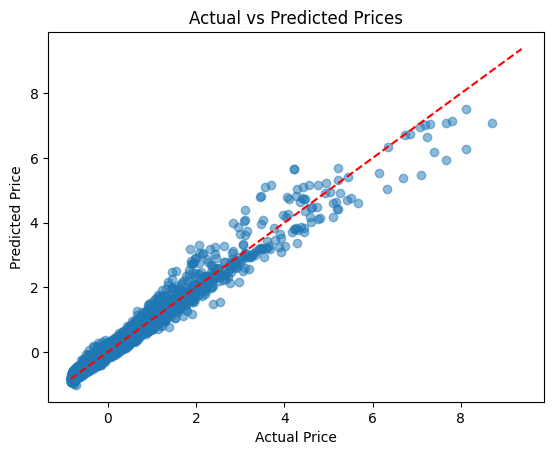

In [243]:
n = len(y_train)

idx = np.random.choice(n, size=5000, replace=False)

y_train_sample = y_train.iloc[idx] if hasattr(y_train, "iloc") else y_train[idx]
y_pred_sample = y_pred_train.iloc[idx] if hasattr(y_pred_train, "iloc") else y_pred_train[idx]

plt.scatter(y_train_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

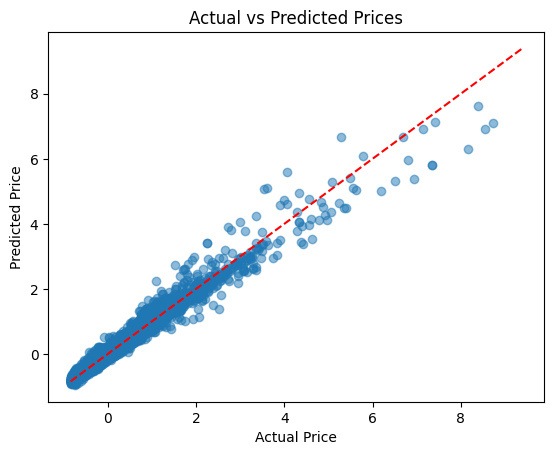

In [244]:
n = len(y_test)

idx = np.random.choice(n, size=5000, replace=False)

y_test_sample = y_test.iloc[idx] if hasattr(y_test, "iloc") else y_test[idx]
y_pred_sample = y_pred_test.iloc[idx] if hasattr(y_pred_test, "iloc") else y_pred_test[idx]

plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()